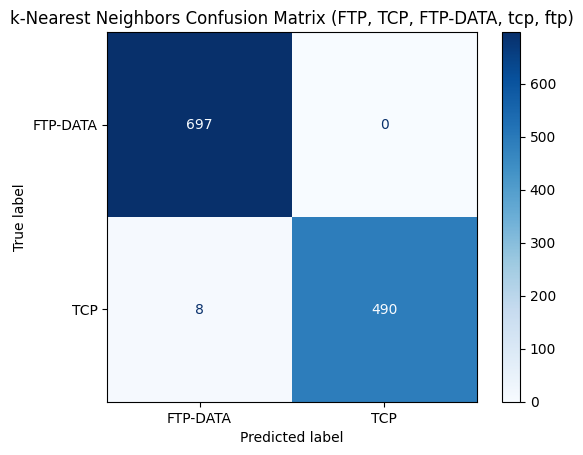

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/Processed_Network_Traffic_Analysis.csv', sep=',')

# Filter data for specific protocol types
selected_protocols = ['TCP', 'FTP-DATA', 'tcp', 'ftp']
filtered_data = data[data['Protocol'].isin(selected_protocols)]

# Preprocess the data
X = filtered_data[['Source', 'Destination', 'Length']]  # Features
y = filtered_data['Protocol']  # Target variable

# Apply one-hot encoding to categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets based on protocol and source and destination ips
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the k-Nearest Neighbors model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("k-Nearest Neighbors Confusion Matrix (FTP, TCP, FTP-DATA, tcp, ftp)")
plt.show()


